<a href="https://mng.bz/8wdg" target="_blank">
    <img src="../../Assets/Images/NewMEAPHeader.png" alt="New MEAP" style="width: 100%;" />
</a>


# Chapter 03 - Indexing Pipeline: Creating a Knowledge Base for RAG-based Applications

### Welcome to chapter 3 of A Simple Introduction to Retrieval Augmented Generation. This is the first chapter of the book where we use code examples in python.

In this chapter, we introduce the concepts behind the indexing pipeline that facilitates building a knowledge base for RAG enabled applications

The example that we have been following is to ask the question - __Who won the 2023 Cricket World Cup?__ to a Large Language Model. We are fetching context from a __Wikipedia Article__ - https://en.wikipedia.org/wiki/2023_Cricket_World_Cup

We first did this manually with ChatGPT. Now, we will do this programatically. We will be using a very popular orchestration framework in python called __LangChain__ - https://www.langchain.com/

<img src="../../Assets/Images/3.1.png">

## Installing Dependencies

All the necessary libraries for running this notebook along with their versions can be found in __requirements.txt__ file in the root directory of this repository

You should go to the root directory and run the following command to install the libraries

```
pip install -r requirements.txt
```

This is the recommended method of installing the dependencies

___
Alternatively, you can run the command from this notebook too. The relative path may vary

In [2]:
%pip install -r ../../requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


## 1. Loading Data

The first step towards building a knowledge base (or non-parametric memory) of a RAG-enabled system is to source data from its original location. This data may be in the form of word documents, pdf files, csv, HTML etc. Further, the data may be stored in file, block or object stores, in data lakes, data warehouses or even in third party sources that can be accessed via the open internet. This process of sourcing data from its original location is called __Data Loading__. 

Data Loading includes the following four steps:
- __Connection__ to the source of the data
- __Extraction and Parsing of text__ from the source format
- Reviewing and updating __metadata__ information
- Cleaning or __transforming__ the data


<img src="../../Assets/Images/3.2.png" width=400>

#### __Connecting & Parsing an external URL__

We will now use LangChain to __connect to Wikipedia__ and __extract data__ from the page about the 2023 Cricket World Cup. For this we will use the __AsyncHtmlLoader__ function from the document_loaders library in the langchain-community package.

Let us load the url of our example i.e. the Wikipedia Page of the 2023 Cricket World Cup

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#This is the url of the wikipedia page on the 2023 Cricket World Cup
url="https://en.wikipedia.org/wiki/2023_Cricket_World_Cup"

In [4]:
#Import library
from langchain_community.document_loaders import AsyncHtmlLoader

#Instantiate the AsyncHtmlLoader object
loader = AsyncHtmlLoader (url)

#Loading the extracted information
html_data = loader.load()


USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.33it/s]


To verify the extracted text and the metadata, let us print a few tokens

In [5]:
import textwrap

print(textwrap.fill(f"First 1000 characters of extracted content -\n\n{html_data[0].page_content[:1000]}", width=150))

First 1000 characters of extracted content -  <!DOCTYPE html> <html class="client-nojs vector-feature-language-in-header-enabled vector-feature-
language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-
pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1
vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-
available" lang="en" dir="ltr"> <head> <meta charset="UTF-8"> <title>2023 Cricket World Cup - Wikipedia</title> <script>(function(){var
className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-
disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-

#### __Metadata Review__

In [6]:
print(f"Metadata information - \n\n{html_data[0].metadata}")

Metadata information - 

{'source': 'https://en.wikipedia.org/wiki/2023_Cricket_World_Cup', 'title': '2023 Cricket World Cup - Wikipedia', 'language': 'en'}


We can see that some __content has been extracted__. Also, some __metadata__ information is present.

#### __Document Transformation__

The content is in __HTML format__ which does not convey a lot of factual information. 

LangChain also provides a bunch of document transformers for converting formats.


We will now transform this data into a readable format using __Html2TextTransformer__ class.

In [7]:
from langchain_community.document_transformers import Html2TextTransformer

#Instantiate the Html2TextTransformer function
html2text = Html2TextTransformer()


#Call transform_documents
html_data_transformed = html2text.transform_documents(html_data)

Let us review the extracted content, now transformed by the Html2TextTransformer

In [8]:
print(f"First 100 characters of extracted content -\n\n{html_data_transformed[0].page_content[:1000]}")

First 100 characters of extracted content -

Jump to content

Main menu

Main menu

move to sidebar hide

Navigation

  * Main page
  * Contents
  * Current events
  * Random article
  * About Wikipedia
  * Contact us

Contribute

  * Help
  * Learn to edit
  * Community portal
  * Recent changes
  * Upload file
  * Special pages

Search

Search

Appearance

  * Donate
  * Create account
  * Log in

Personal tools

  * Donate
  * Create account
  * Log in

Pages for logged out editors learn more

  * Contributions
  * Talk

## Contents

move to sidebar hide

  * (Top)

  * 1 Background

Toggle Background subsection

    * 1.1 Host selection

    * 1.2 COVID-19 pandemic

    * 1.3 Format

    * 1.4 Pakistan's participation

    * 1.5 Prize money

    * 1.6 Marketing

  * 2 Qualification

  * 3 Venues

  * 4 Squads

  * 5 Match officials

  * 6 Warm-up matches

  * 7 Group stage

Toggle Group stage subsection

    * 7.1 Points table

    * 7.2 Results

  * 8 Knockout stage

Toggle Knocko

Now, we see that we have text in a __readable english__ language!

#### __Optional: BeautifulSoupTransformer__


But you may notics that there's a lot of information like Menu Options, Header and footer information that may not be very useful.

Another options is the __BeautifulSoupTransformer__ in LangChain that allows you to extract specific tags from HTML pages. Let us extract information contained in 'p' tags.

In [9]:
from langchain_community.document_transformers import BeautifulSoupTransformer

soup_transformer = BeautifulSoupTransformer()

html_data_p_tags = soup_transformer.transform_documents(html_data, tags_to_extract=["p"])


In [10]:
print(textwrap.fill(
f"First 100 characters of extracted content -\n\n{html_data_p_tags[0].page_content[:1000]}", width=100))

First 100 characters of extracted content -  The 2023 ICC Men's Cricket World Cup was the 13th
edition of the ICC Men's Cricket World Cup (/wiki/ICC_Men%27s_Cricket_World_Cup) , a quadrennial One
Day International (/wiki/One_Day_International) (ODI) cricket (/wiki/Cricket) tournament organized
by the International Cricket Council (/wiki/International_Cricket_Council) (ICC). It was hosted from
5 October to 19 November 2023 across ten venues in India (/wiki/India) . This was the fourth World
Cup held in India, but the first where India was the sole host. The tournament was contested by ten
national teams, maintaining the same format used in 2019 (/wiki/2019_Cricket_World_Cup) . After six
weeks of round-robin matches, India (/wiki/India_national_cricket_team) , South Africa
(/wiki/South_Africa_national_cricket_team) , Australia (/wiki/Australia_national_cricket_team) , and
New Zealand (/wiki/New_Zealand_national_cricket_team) finished as the top four and qualified for the
knockout stage. 

#### __Congratulations__

With this, we have successfully completed the data loading step of the indexing pipeline. We move now to the next step of __Chunking__

But before that, check out the document loaders and transformers available in LangChain

__Document Loaders__  - [https://python.langchain.com/docs/integrations/document_loaders/]

__Document Transformers__ - [https://python.langchain.com/docs/integrations/document_transformers/]

---

## 2. Data Splitting (Chunking)

Breaking down long pieces of text into manageable sizes is called __Data Splitting__ or __Chunking__. This is done for various reasons like Context Window Limitations, Search Complexity, Lost in the middle kind of issues.

### <span style="color:#47c7fc">Understanding Chunking: What is it ?</span>

In cognitive psychology, chunking is defined as process by which individual pieces of information are bound together into a meaningful whole. (https://psycnet.apa.org/record/2003-09163-002) and a chunk is a familiar collection of elementary units. The idea is that chunking is an essential technique through which human beings perceive the world and commit to memory. The simplest example is how we remember long sequences of digits like phone numbers, credit card numbers, dates or even OTPs. We don’t remember the entire sequences but in our minds, we break them down into chunks.

The role of chunking in RAG and the underlying idea is somewhat similar to what it is in real life. Once you’ve extracted and parsed text from the source, instead of committing it all to memory as a single element, you break it down into smaller chunks.

> Breaking down long pieces of text into manageable sizes is called Chunking

### <span style="color:#47c7fc">Understanding Chunking: Why is it necessary ?</span>
There are two main benefits of chunking —

- It leads to better retrieval of information. If a chunk represents a single idea (or fact) it can be retrieved with more confidence that if there are multiple ideas (or facts) within the same chunk.
- It leads to better generation. The retrieved chunk has information that is focussed on the user query and does not have any other text that may confuse the LLM. Therefore, the generation is more accurate and coherent.

Apart from these two benefits there are two limitations of LLMs that chunking addresses.

- __Context Window of LLMs__: LLMs, due to the inherent nature of the technology, have a limit on the number of tokens (loosely, words) they can work with at a time. This includes both the number of tokens in the prompt (or the input) and the number of tokens in the completion (or the output). The limit on the total number of tokens that an LLM can process in one go is called the context window size. If we pass an input that is longer than the context window size, the LLM chooses to ignore all text beyond the size. It becomes very important to be careful with the amount to text that is being passed to the LLM.

- __Lost in the middle problem__: Even in those LLMs which have a long context window (Claude 3 by Anthropic has a context window of up to 200,00 tokens), an issue with accurately reading the information has been observed. It has been noticed that accuracy declines dramatically if the relevant information is somewhere in the middle of the prompt. This problem can be addressed by passing only the relevant information to the LLM instead of the entire document.

### <span style="color:#47c7fc">Fixed Size Chunking</span>

A very common approach is to pre-determine the size of the chunk and the amount of overlap between the chunks. There are several chunking methods that follow a fixed size chunking approach.

- Character-Based Chunking: Chunks are created based on a fixed number of characters

- Token-Based Chunking: Chunks are created based on a fixed number of tokens.

- Sentence-Based Chunking: Chunks are defined by a fixed number of sentences

- Paragraph-Based Chunking: Chunks are created by dividing the text into a fixed number of paragraphs.

Let's try Character-Based Chunking. 

In [11]:
from langchain.text_splitter import CharacterTextSplitter #Character Based Text Splitter from LangChain

text_splitter = CharacterTextSplitter(
separator="\n", #The character that should be used to split.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

text_chunks=text_splitter.create_documents([html_data_transformed[0].page_content])

#Show the number of chunks created
print(f"The number of chunks created : {len(text_chunks)}")


The number of chunks created : 58


In all, this method created 61 chunks. But what about the overlap. Let us check two chunks at random, say, chunk 4 and chunk 5. We will compare the last 200 characters of chunk 4 with the first 200 characters of chunk 5.

In [12]:
text_chunks[4].page_content[-200:]

'on was to be played from 9 February to 26 March\n2023.[3][4] In July 2020 it was announced that due to the disruption of the\nqualification schedule by the COVID-19 pandemic, the start of the tournament'

In [13]:
text_chunks[5].page_content[:200]

'qualification schedule by the COVID-19 pandemic, the start of the tournament\nwould be delayed to October.[5][6] The ICC released the tournament schedule on\n27 June 2023.[7][8]\n### Format\nThis was the '

Now, let's see the size distribution of the chunks that have been created

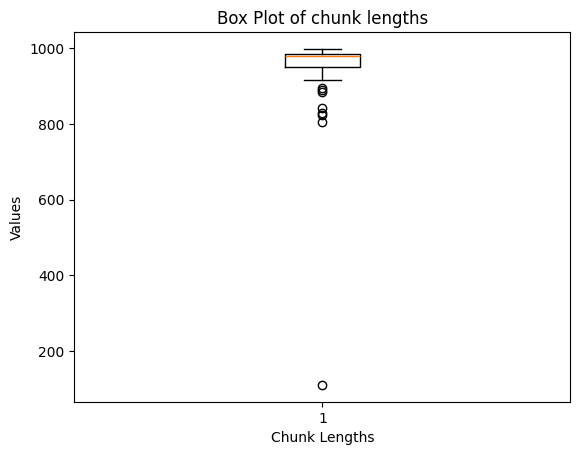

The median chunk length is : 979.5
The average chunk length is : 944.72
The minimum chunk length is : 111
The max chunk length is : 998
The 75th percentile chunk length is : 985.0
The 25th percentile chunk length is : 949.0


In [14]:
import matplotlib.pyplot as plt
import numpy as np


data = [len(doc.page_content) for doc in text_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths') 
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values') 

plt.show()

print(f"The median chunk length is : {round(np.median(data),2)}")
print(f"The average chunk length is : {round(np.mean(data),2)}")
print(f"The minimum chunk length is : {round(np.min(data),2)}")
print(f"The max chunk length is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

### <span style="color:#47c7fc">Document-structured based Chunking</span>

The aim of chunking is to keep meaningful data together. If we are dealing with data in form of HTML, Markdown, JSON or even computer code, it makes more sense to split the data based on the structure rather than a fixed size. Another approach for chunking is to take into consideration the format of the extracted and loaded data. A markdown file, for example is organised by headers, a code written in a programming language like python or java is organized by classes and functions and HTML, likewise, is organised in headers and sections. For such formats a specialised chunking approach can be employed.

Examples of structure-based splitting:

- Markdown: Split based on headers (e.g., #, ##, ###)
- HTML: Split using tags
- JSON: Split by object or array elements
- Code: Split by functions, classes, or logical blocks


Let's recollect out HTML document from the url.

In [15]:
loader = AsyncHtmlLoader (url)

html_data = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.45it/s]


To split the HTML text based on tags (e.g., h1, section, table, etc.), LangChain provides __HTMLSectionSplitter__. It splits the text and adds metadata for each section. Let's take a look.


In [16]:
from langchain_text_splitters import HTMLSectionSplitter

sections_to_split_on = [
    ("h1", "Header 1"),
     ("h2", "Header 2"),
     ("table","Table"),
     #("div", "Div"),
     #("img","Image"),
     ("p","P"),


]

splitter = HTMLSectionSplitter(sections_to_split_on)

split_content = splitter.split_text(html_data[0].page_content)

The above document object '__split_content__' will have chunks divided based on the provided HTML tags. Let's look at the top 10 documents.

In [17]:
split_content[:10]

[Document(metadata={'Header 1': '#TITLE#'}, page_content='Jump to content \n \n \n \n \n \n \n \n Main menu \n \n \n \n \n \n Main menu \n move to sidebar \n hide \n \n \n \n\t\tNavigation\n\t \n \n \n Main page \n Contents \n Current events \n Random article \n About Wikipedia \n Contact us \n \n \n \n \n \n\t\tContribute\n\t \n \n \n Help \n Learn to edit \n Community portal \n Recent changes \n Upload file \n Special pages \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Search \n \n \n \n \n \n \n \n \n \n \n \n Search \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Appearance \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Donate \n \n \n Create account \n \n \n Log in \n \n \n \n \n \n \n \n \n Personal tools \n \n \n \n \n \n Donate \n   Create account \n   Log in \n \n \n \n \n \n\t\tPages for logged out editors  learn more \n \n \n \n Contributions \n Talk \n \n \n \n \n \n \n \n \n \n \n \n \n  CentralNotice'),
 Document(metadata={'Header

We can see the metatadata indicating the section tag of the chunk.
So how many chunks were created?

In [18]:
len(split_content)

230

Let's see how many chunks for each of the sections

In [19]:
from collections import Counter

class_counter = Counter()

for doc in split_content:
    document_class = next(iter(doc.metadata.keys()))
    class_counter[document_class] += 1

print(class_counter)

Counter({'Table': 188, 'P': 26, 'Header 2': 14, 'Header 1': 2})


Now, let us look at the lengths of these chunks

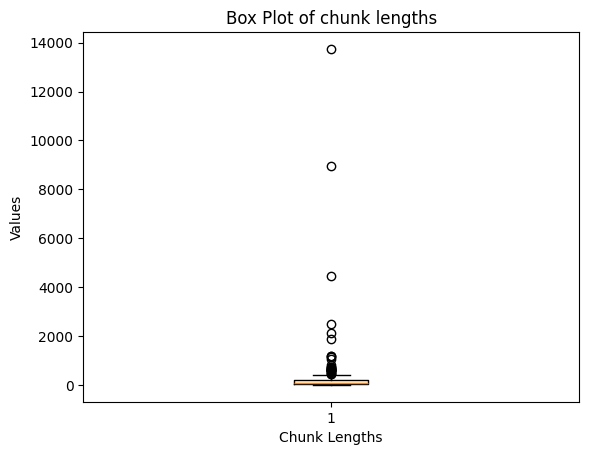

The median chunk lenght is : 71.0
The average chunk lenght is : 297.72
The minimum chunk lenght is : 12
The max chunk lenght is : 13740
The 75th percentile chunk length is : 198.5
The 25th percentile chunk length is : 37.0


In [20]:

data = [len(doc.page_content) for doc in split_content]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values')  

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

Some of the chunk lengths are longer than 1000. Let's try to control that.

In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter #Another Character Based Text Splitter from LangChain

text_splitter = RecursiveCharacterTextSplitter(
separators=["\n\n","\n","."], #The character that should be used to split. More than one can be given to try recursively.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

final_chunks=text_splitter.split_documents(split_content)

#Show the number of chunks created
print(f"The number of chunks created : {len(final_chunks)}")

The number of chunks created : 275


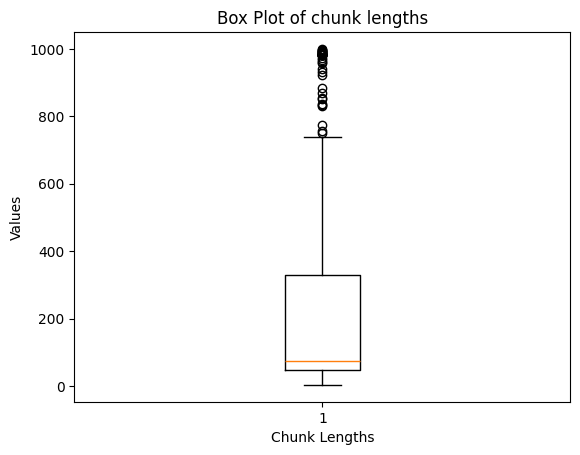

The median chunk lenght is : 75.0
The average chunk lenght is : 254.96
The minimum chunk lenght is : 3
The max chunk lenght is : 1000
The 75th percentile chunk length is : 328.5
The 25th percentile chunk length is : 47.5


In [22]:

data = [len(doc.page_content) for doc in final_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')  # Title
plt.xlabel('Chunk Lengths')  # Label for x-axis
plt.ylabel('Values')  # Label for y-axis

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

<img src="../../Assets/Images/3.4.png">

#### __Congratulations__

With this, you have successfully completed the chunking of the data. We move now to the next step of creating __Embeddings__

But before that, check out the splitters available in LangChain

__Text Splitters__  - [https://python.langchain.com/docs/concepts/text_splitters/]

## Data Conversion (Embeddings)

Computers, at the very core, do mathematical calculations. Mathematical calculations are done on numbers. Therefore, for a computer to process any kind of non-numeric data like text or image, it must be first converted into a numerical form. 

Embeddings is a design pattern that is extremely helpful in the fields of data science, machine learning and artificial intelligence. Embeddings are vector representations of data. As a general definition, embeddings are data that has been transformed into n-dimensional matrices. A word embedding is a vector representation of words. 

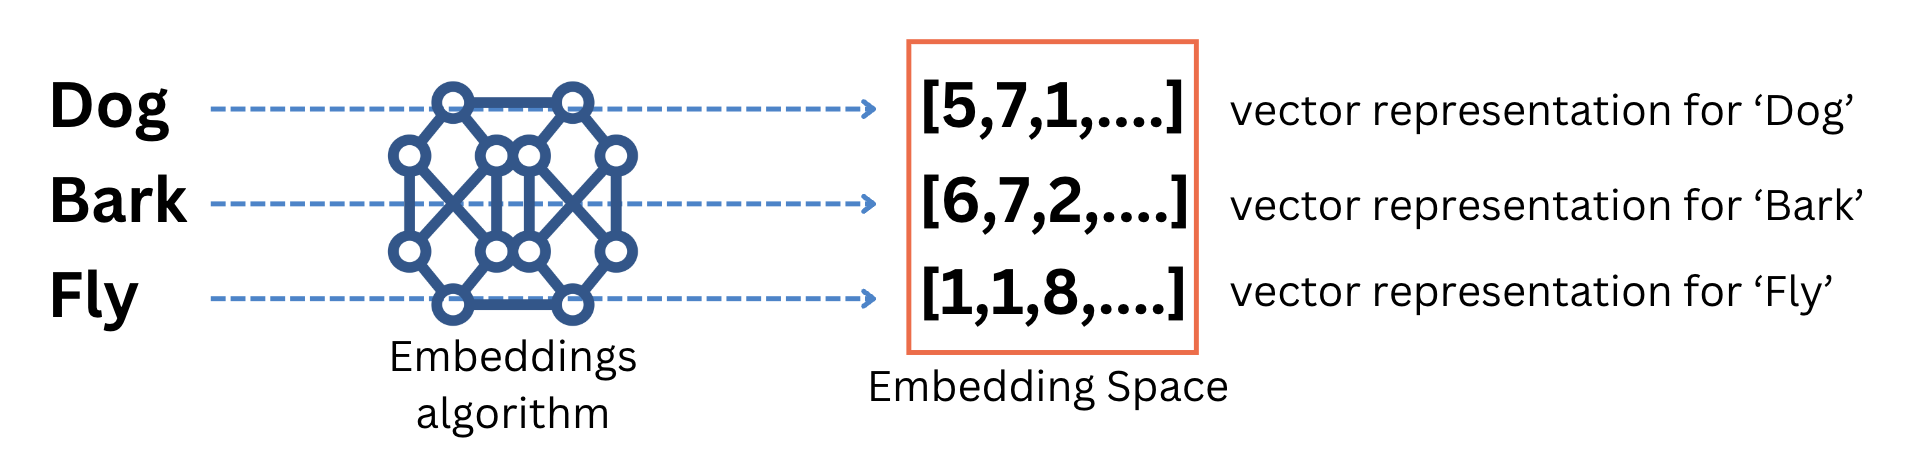

#### __Open Source Embeddings from HuggingFace__

Let's begin with an opensource embeddings from HuggingFace!

In [23]:
from langchain_huggingface import HuggingFaceEmbeddings

hfembeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

hf_embeddings = hfembeddings.embed_documents([chunk.page_content for chunk in final_chunks])


In [24]:
print(f"The lenght of the embeddings vector is {len(hf_embeddings[0])}")
print(f"The embeddings object is an array of {len(hf_embeddings)} X {len(hf_embeddings[0])}")

The lenght of the embeddings vector is 768
The embeddings object is an array of 275 X 768


#### __OpenAI Embeddings__

OpenAI, the company behind ChatGPT and GPT series of Large Language Models also provide three Embeddings Models. 

1.	text-embedding-ada-002 was released in December 2022. It has a dimension of 1536 meaning that it converts text into a vector of 1536 dimensions.
2.	text-embedding-3-small is the latest small embedding model of 1536 dimensions released in January 2024. The flexibility it provides over ada-002 model is that users can adjust the size of the dimensions according to their needs.
3.	text-embedding-3-large is a large embedding model of 3072 dimensions released together with the text-embedding-3-small model. It is the best performing model released by OpenAI yet.


OpenAI models are proprietary and can be accessed using the OpenAI API and are priced based on the number of input tokens for which embeddings are desired. 


Note: You will need an __OpenAI API Key__ which can be obtained from [OpenAI](https://platform.openai.com/api-keys)

To initialize the __OpenAI client__, we need to pass the api key. There are many ways of doing it. 

####  [Option 1] Creating a .env file for storing the API key and using it # Recommended

Install the __dotenv__ library

_The dotenv library is a popular tool used in various programming languages, including Python and Node.js, to manage environment variables in development and deployment environments. It allows developers to load environment variables from a .env file into their application's environment._

- Create a file named .env in the root directory of their project.
- Inside the .env file, then define environment variables in the format VARIABLE_NAME=value. 

e.g.

OPENAI_API_KEY=YOUR API KEY

In [25]:
from dotenv import load_dotenv
import os

if load_dotenv():
    print("Success: .env file found with some environment variables")
else:
    print("Caution: No environment variables found. Please create .env file in the root directory or add environment variables in the .env file")

Success: .env file found with some environment variables


#### [Option 2] Alternatively, you can set the API key in code. 
However, this is not recommended since it can leave your key exposed for potential misuse. Uncomment the cell below to use this method.

In [26]:
# import os
# os.environ["OPENAI_API_KEY"] = "sk-proj-******" #Imp : Replace with an OpenAI API Key

We can also test if the key is valid or not

In [27]:
import openai

api_key=os.environ["OPENAI_API_KEY"]

from openai import OpenAI

client = OpenAI()


if api_key:
    try:
        client.models.list()
        print("OPENAI_API_KEY is set and is valid")
    except openai.APIError as e:
        print(f"OpenAI API returned an API Error: {e}")
        pass
    except openai.APIConnectionError as e:
        print(f"Failed to connect to OpenAI API: {e}")
        pass
    except openai.RateLimitError as e:
        print(f"OpenAI API request exceeded rate limit: {e}")
        pass

else:
    print("Please set you OpenAI API key as an environment variable OPENAI_API_KEY")


OPENAI_API_KEY is set and is valid


Now we will use the __OpenAIEmbeddings__ library from langchain 

In [28]:
# Import OpenAIEmbeddings from the library
from langchain_openai import OpenAIEmbeddings


os.environ["TOKENIZERS_PARALLELISM"]="false"

# Instantiate the embeddings object
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Create embeddings for all chunks
openai_embeddings = embeddings.embed_documents([chunk.page_content for chunk in final_chunks])


In [29]:
print(f"The lenght of the embeddings vector is {len(openai_embeddings[0])}")
print(f"The embeddings object is an array of {len(openai_embeddings)} X {len(openai_embeddings[0])}")


The lenght of the embeddings vector is 1536
The embeddings object is an array of 275 X 1536


#### __Congratulations__

With this, we have successfully completed the creation of embeddings. We move now to the next step of storing the embeddings in a  __Vector Store__

Read more about [Embedding Models Here](https://python.langchain.com/docs/integrations/text_embedding/)

## Storage (Vector Databases)

The data has been loaded, split, and converted into embeddings. For us to use this information repeatedly, we need to store it in memory so that it can be accessed on demand. Vector Databases are built to handle high dimensional vectors. These databases specialize in indexing and storing vector embeddings for fast semantic search and retrieval. 

#### Facebook AI Similarity Search (FAISS)

In [30]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatIP(len(openai_embeddings[0]))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vector_store.add_documents(documents=final_chunks)


['2cc622d1-02e8-44aa-8476-06e1058055f5',
 '51bdfd38-bb64-47d3-8ad5-192a7e14896b',
 '6991abe6-d43c-4b60-ac5a-37f5da3bf233',
 '6c7b6259-2227-4038-bea4-37541a773899',
 '01264110-ed9b-43a9-8f7e-459637ec1739',
 '2c4a1175-4535-4cec-ab9f-9edf531792e4',
 '63f83f79-947e-48f3-90a4-6843122fa5fc',
 'ceedcde7-c618-4622-9129-6e21ca41e4b2',
 'a066cce1-45db-43de-9e7b-126c8294254c',
 'd237117f-79ca-4345-b10d-023c75785695',
 '898967d9-06cc-43c8-b914-6c8148281dca',
 '9d9eecde-0b46-4d4c-b2ce-86b6e062c430',
 'e1fad4bc-94db-4015-b50e-0eb52a380138',
 '363f4482-12ad-4317-9bd7-f38b10d4f970',
 'f03d417f-5148-4e95-9b18-4d2fbb24288d',
 'bb3c60b0-9067-4481-b97a-c63f3d59033f',
 'f9896749-60fb-47a2-a479-013763b97e97',
 'a3a756d8-e9bc-4c21-b58b-abab5c95b6fd',
 'e370f23f-44f2-4643-bdf3-7bd9cc9d34ca',
 'df19771c-cf9b-4749-a0f8-8807d10d8433',
 'bbbaf718-1149-4a3c-a1b9-093df670a140',
 'ffff3a34-e0fd-4d83-b7ad-f90510d9b10f',
 'eb2d4b4d-8cb5-4499-981c-b89e3dc8f697',
 '90182803-2df8-484e-8025-46adf5d7c0f8',
 '27b36f93-8371-

We can also save the vector store in persistent memory to use it later!

In [31]:
vector_store.save_local(folder_path="../../Assets/Data",index_name="CWC_index")

## Search and Retrieval Example

As a glimpse of what happens next, this Vector Index can be used to retrieve documents that are most relevant to the query.

In [32]:
# Original Question
query = "Who won the World Cup final?"
# Ranking the chunks in descending order of similarity
docs = vector_store.similarity_search(query)
# Printing the top ranked chunk
print(docs[0].page_content)

The tournament was contested by ten national teams, maintaining the same format used in  2019 . After six weeks of round-robin matches,  India ,  South Africa ,  Australia , and  New Zealand  finished as the top four and qualified for the knockout stage. In the knockout stage, India and Australia beat New Zealand and South Africa, respectively, to advance to the final, played on 19 November at the  Narendra Modi Stadium  in  Ahmedabad . Australia won the final by six wickets, winning their sixth Cricket World Cup title.


---

This brings us at the end of Chapter 3. The four steps of loading, chunking, embedding and storing complete the indexing pipeline. Indexing pipeline is an __offline process__. The Vector Index needs to be created once and then updated at a periodic frequency.

In Chapter 4, we will use this created index or knowledge base to handle real-time generations.

---

<img src="../../Assets/Images/profile_s.png" width=100> 

Hi! I'm Abhinav! I am an entrepreneur and Vice President of Artificial Intelligence at Yarnit. I have spent over 15 years consulting and leadership roles in data science, machine learning and AI. My current focus is in the applied Generative AI domain focussing on solving enterprise needs through contextual intelligence. I'm passionate about AI advancements constantly exploring emerging technologies to push the boundaries and create positive impacts in the world. Let’s build the future, together!

[If you haven't already, please subscribe to the MEAP of A Simple Guide to Retrieval Augmented Generation here](https://mng.bz/8wdg)

<a href="https://mng.bz/8wdg" target="_blank">
    <img src="../../Assets/Images/NewMEAPFooter.png" alt="New MEAP" style="width: 100%;" />
</a>

#### If you'd like to chat, I'd be very happy to connect

[![GitHub followers](https://img.shields.io/badge/Github-000000?style=for-the-badge&logo=github&logoColor=black&color=orange)](https://github.com/abhinav-kimothi)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-000000?style=for-the-badge&logo=linkedin&logoColor=orange&color=black)](https://www.linkedin.com/comm/mynetwork/discovery-see-all?usecase=PEOPLE_FOLLOWS&followMember=abhinav-kimothi)
[![Medium](https://img.shields.io/badge/Medium-000000?style=for-the-badge&logo=medium&logoColor=black&color=orange)](https://medium.com/@abhinavkimothi)
[![Insta](https://img.shields.io/badge/Instagram-000000?style=for-the-badge&logo=instagram&logoColor=orange&color=black)](https://www.instagram.com/akaiworks/)
[![Mail](https://img.shields.io/badge/email-000000?style=for-the-badge&logo=gmail&logoColor=black&color=orange)](mailto:abhinav.kimothi.ds@gmail.com)
[![X](https://img.shields.io/badge/Follow-000000?style=for-the-badge&logo=X&logoColor=orange&color=black)](https://twitter.com/abhinav_kimothi)
[![Linktree](https://img.shields.io/badge/Linktree-000000?style=for-the-badge&logo=linktree&logoColor=black&color=orange)](https://linktr.ee/abhinavkimothi)
[![Gumroad](https://img.shields.io/badge/Gumroad-000000?style=for-the-badge&logo=gumroad&logoColor=orange&color=black)](https://abhinavkimothi.gumroad.com/)